In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import folium.plugins as plugins
import scipy.stats as stats
from sklearn.linear_model import LinearRegression


In [87]:
full_fires_df = pd.read_csv('/Users/kaciewebster/Documents/dsi/ca-fire-incidents/California_Fire_Incidents.csv')
full_fires_df.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [88]:
full_fires_df.shape

(1636, 40)

In [89]:
full_fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1633 non-null   float64
 1   Active                1636 non-null   bool   
 2   AdminUnit             1636 non-null   object 
 3   AirTankers            28 non-null     float64
 4   ArchiveYear           1636 non-null   int64  
 5   CalFireIncident       1636 non-null   bool   
 6   CanonicalUrl          1636 non-null   object 
 7   ConditionStatement    284 non-null    object 
 8   ControlStatement      111 non-null    object 
 9   Counties              1636 non-null   object 
 10  CountyIds             1636 non-null   object 
 11  CrewsInvolved         171 non-null    float64
 12  Dozers                123 non-null    float64
 13  Engines               191 non-null    float64
 14  Extinguished          1577 non-null   object 
 15  Fatalities           

In [197]:
full_fires_df['Started'].apply(lambda x: pd.to_datetime(x[:10]))
full_fires_df['StartDate'] = full_fires_df['Started'].apply(lambda x: pd.to_datetime(x[:10]))

In [90]:
full_fires_df['Started'].apply(lambda x: int(x[:4])).value_counts()
# 2 observations from 1969, so drop them.

2017    437
2018    315
2019    266
2016    185
2013    162
2015    152
2014    117
1969      2
Name: Started, dtype: int64

In [91]:
full_fires_df['StartYear'] = full_fires_df['Started'].apply(lambda x: int(x[:4]))
full_fires_df['StartYear']

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
1631    2019
1632    2019
1633    2019
1634    2019
1635    2019
Name: StartYear, Length: 1636, dtype: int64

In [92]:
full_fires_df['Started'].apply(lambda x: int(x[5:7])).value_counts()

7     415
6     319
8     282
9     208
10    147
5     140
11     42
4      35
12     21
1      11
2      10
3       6
Name: Started, dtype: int64

In [93]:
full_fires_df['StartMonth'] = full_fires_df['Started'].apply(lambda x: int(x[5:7]))
full_fires_df['StartMonth']

0        8
1        5
2        7
3        8
4        5
        ..
1631    10
1632     6
1633    11
1634    10
1635    10
Name: StartMonth, Length: 1636, dtype: int64

In [198]:
ca_fires_df = full_fires_df[['UniqueId', 'Name', 'Counties', 'StartYear', 'StartMonth', 'StartDate', 'AcresBurned', 'Latitude', 'Longitude', 'MajorIncident']]
ca_fires_df.shape
# created dataframe with columns: Name, Counties, StartYear, StartMonth, StartDate, AcresBurned, Latitude, Longitude.

(1636, 10)

In [199]:
ca_fires_df = ca_fires_df.dropna(axis=0, subset=['AcresBurned'])
ca_fires_df.shape
# removed null values from AcresBurned column.

(1633, 10)

In [200]:
ca_fires_df = ca_fires_df[(ca_fires_df['Latitude'] >= 32) & (ca_fires_df['Latitude'] <= 42) & (ca_fires_df['Longitude'] <= -114) & (ca_fires_df['Longitude'] >= -126)]
ca_fires_df.shape
# removed observations that were not in CA.

(1462, 10)

In [201]:
ca_fires_df = ca_fires_df[ca_fires_df['StartYear'] >= 2013]
ca_fires_df.shape
# removed observations that are not in the range 2013-2019.

(1460, 10)

In [202]:
ca_fires_df[(ca_fires_df['Latitude'] >= 38) & (ca_fires_df['Latitude'] <= 41) & (ca_fires_df['Longitude'] <= -115) & (ca_fires_df['Longitude'] >= -118)]
ca_fires_df[ca_fires_df['Counties'] == 'State of Nevada']
# how I found out which fires were from Nevada.

,UniqueId,Name,Counties,StartYear,StartMonth,StartDate,AcresBurned,Latitude,Longitude,MajorIncident
1424,3086ac2b-bbb3-4321-81e3-3cfdb9e571e9,Jasper Fire,State of Nevada,2019,7,2019-07-13,1165.0,39.631945,-119.769881,False


In [203]:
ca_fires_df = ca_fires_df[ca_fires_df['Counties'] != 'State of Nevada']
ca_fires_df = ca_fires_df[ca_fires_df['Name'] != 'Tram Fire']
ca_fires_df.shape
# removed observations that are in Nevada.
# one that had a county name, 'State of Nevada', and one that had coordinates outside of CA.

(1458, 10)

In [204]:
ca_fires_df['MajorIncident'].sum()
# 347 True's.

347

In [205]:
ca_fires_df.head()

,UniqueId,Name,Counties,StartYear,StartMonth,StartDate,AcresBurned,Latitude,Longitude,MajorIncident
0,5fb18d4d-213f-4d83-a179-daaf11939e78,Rim Fire,Tuolumne,2013,8,2013-08-17,257314.0,37.857000,-120.086000,False
1,bf37805e-1cc2-4208-9972-753e47874c87,Powerhouse Fire,Los Angeles,2013,5,2013-05-30,30274.0,34.585595,-118.423176,False
2,a3149fec-4d48-427c-8b2c-59e8b79d59db,Mountain Fire,Riverside,2013,7,2013-07-15,27531.0,33.709500,-116.728850,False
3,8213f5c7-34fa-403b-a4bc-da2ace6e6625,American Fire,Placer,2013,8,2013-08-10,27440.0,39.120000,-120.650000,False
5,bee8c339-4f26-4b78-a5b4-a8a0ebdb8786,Aspen Fire,Fresno,2013,7,2013-07-22,22992.0,37.279000,-119.318000,False


In [206]:
ca_fires_df.describe()

,StartYear,StartMonth,AcresBurned,Latitude,Longitude
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,2016.792867,7.396433,4705.664609,37.257266,-120.307460
std,1.804335,1.757201,28579.715193,2.553023,2.006310
min,2013.000000,1.000000,0.000000,32.557546,-124.196290
25%,2016.000000,6.000000,35.000000,34.965330,-121.870888
50%,2017.000000,7.000000,98.500000,37.459045,-120.723180
75%,2018.000000,9.000000,419.000000,39.246780,-118.768455
max,2019.000000,12.000000,410203.000000,41.999341,-114.572650


In [207]:
ca_fires_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1632
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UniqueId       1458 non-null   object        
 1   Name           1458 non-null   object        
 2   Counties       1458 non-null   object        
 3   StartYear      1458 non-null   int64         
 4   StartMonth     1458 non-null   int64         
 5   StartDate      1458 non-null   datetime64[ns]
 6   AcresBurned    1458 non-null   float64       
 7   Latitude       1458 non-null   float64       
 8   Longitude      1458 non-null   float64       
 9   MajorIncident  1458 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 115.3+ KB


In [208]:
ca_fires_df['UniqueId'].nunique()

1433

In [209]:
ca_fires_df[ca_fires_df['Name']=='Ranch Fire (Mendocino Complex)']
# checking that the same fires aren't getting different UniqueIds.

,UniqueId,Name,Counties,StartYear,StartMonth,StartDate,AcresBurned,Latitude,Longitude,MajorIncident
1054,90b0daf7-5d84-42d9-bb35-bb78d4faf950,Ranch Fire (Mendocino Complex),Colusa,2018,7,2018-07-27,410203.0,39.243283,-123.103367,True
1055,90b0daf7-5d84-42d9-bb35-bb78d4faf950,Ranch Fire (Mendocino Complex),Glenn,2018,7,2018-07-27,410203.0,39.243283,-123.103367,True
1056,90b0daf7-5d84-42d9-bb35-bb78d4faf950,Ranch Fire (Mendocino Complex),Lake,2018,7,2018-07-27,410203.0,39.243283,-123.103367,True
1057,90b0daf7-5d84-42d9-bb35-bb78d4faf950,Ranch Fire (Mendocino Complex),Mendocino,2018,7,2018-07-27,410203.0,39.243283,-123.103367,True


In [210]:
ca_fires_df = ca_fires_df.groupby('UniqueId').max().reset_index()
ca_fires_df.shape
# grouped by UniqueId to not double count fires.

(1433, 10)

In [211]:
ca_fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UniqueId       1433 non-null   object        
 1   Name           1433 non-null   object        
 2   Counties       1433 non-null   object        
 3   StartYear      1433 non-null   int64         
 4   StartMonth     1433 non-null   int64         
 5   StartDate      1433 non-null   datetime64[ns]
 6   AcresBurned    1433 non-null   float64       
 7   Latitude       1433 non-null   float64       
 8   Longitude      1433 non-null   float64       
 9   MajorIncident  1433 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 102.3+ KB


In [274]:
ca_fires_df.head()

,UniqueId,Name,Counties,StartYear,StartMonth,StartDate,AcresBurned,Latitude,Longitude,MajorIncident,FloatDate,idxDate
0,00089805-cdee-4607-8b67-1653bee463bc,Gulch Fire,Modoc,2014,7,2014-07-03,1469.0,41.489000,-120.904000,True,20140703 00:00:00,20140703.0
1,0089d3c4-c554-46e1-8eb9-af95e4dfae0c,Toro Fire,Riverside,2019,8,2019-08-05,94.0,33.740219,-117.333728,False,20190805 00:00:00,20190805.0
2,00a13d84-415e-4106-aa31-2e664ed9eabf,Sky Fire,Shasta,2017,7,2017-07-29,17.0,40.692590,-122.173840,False,20170729 00:00:00,20170729.0
3,00e6d6d5-f168-45fa-817a-f7758a5170b7,Easy Fire,Ventura,2019,10,2019-10-30,1806.0,34.282179,-118.803389,False,20191030 00:00:00,20191030.0
4,01018620-8f10-4de0-a7e6-78cc9a77cc9a,Curie Fire,Santa Clara,2018,7,2018-07-10,70.0,37.225450,-121.791890,False,20180710 00:00:00,20180710.0


In [221]:
ca_fires_df.describe()

,StartYear,StartMonth,AcresBurned,Latitude,Longitude
count,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000
mean,2016.800419,7.390789,3195.606420,37.245557,-120.285628
std,1.797912,1.756305,19354.829499,2.559585,2.005556
min,2013.000000,1.000000,0.000000,32.557546,-124.196290
25%,2016.000000,6.000000,35.000000,34.943730,-121.853180
50%,2017.000000,7.000000,96.000000,37.433192,-120.699550
75%,2018.000000,9.000000,392.000000,39.279833,-118.741030
max,2019.000000,12.000000,410203.000000,41.999341,-114.572650


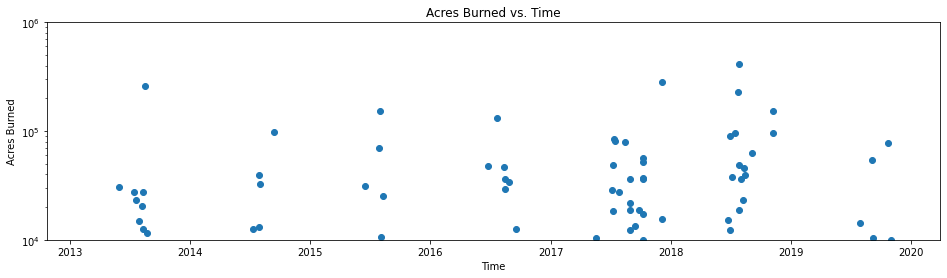

In [285]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.scatter(ca_fires_df['StartDate'], ca_fires_df['AcresBurned'])
ax.set_yscale('log')

ax.set_title('Acres Burned vs. Time')
ax.set_xlabel('Time')
ax.set_ylabel('Acres Burned')
ax.set_ylim(10**4, 10**6)

plt.show()

In [280]:
ca_fires_df.sort_values('idxDate')

,UniqueId,Name,Counties,StartYear,StartMonth,StartDate,AcresBurned,Latitude,Longitude,MajorIncident,FloatDate,idxDate
50,094719ba-a47b-4abb-9ec5-a506b2b9fd23,River Fire,Inyo,2013,2,2013-02-24,406.0,36.602575,-118.016510,True,20130224.0,20130224.0
481,58f89ff8-bd3e-4355-b1c0-8fa05c747d3f,Fawnskin Fire,San Bernardino,2013,4,2013-04-20,30.0,34.288877,-116.941311,False,20130420.0,20130420.0
1194,d8d1c943-7b5d-4885-9043-f41075d6eded,Silverado Fire,Napa,2013,4,2013-04-30,75.0,38.441792,-122.350844,False,20130430.0,20130430.0
315,357ffc13-bef9-48eb-810f-c5de851972eb,Gold Fire,Madera,2013,4,2013-04-30,274.0,37.116295,-119.635004,False,20130430.0,20130430.0
553,64e4f81e-d872-44c4-ba8d-111fa77124ba,Yellow Fire,Sonoma,2013,5,2013-05-01,125.0,38.638828,-122.655616,True,20130501.0,20130501.0
...,...,...,...,...,...,...,...,...,...,...,...,...
292,305f30f5-622d-4c55-8813-45ffbc15aed0,Sobrante Fire,Riverside,2019,11,2019-11-01,19.0,33.849906,-117.461363,False,20191101.0,20191101.0
585,69d98a94-4980-4dc0-b388-61c37c635f32,Ranch Fire,Tehama,2019,11,2019-11-03,2534.0,40.036379,-122.637837,True,20191103.0,20191103.0
521,600d608d-6279-435d-bc9b-99aacaa5e80f,Eagle Fire,Lake,2019,11,2019-11-05,75.0,39.100408,-122.496548,False,20191105.0,20191105.0
638,7555692b-f672-4660-8f15-d0dab068a193,Cave Fire (No Longer a CAL FIRE Incident),Santa Barbara,2019,11,2019-11-25,3126.0,34.502500,-119.785000,False,20191125.0,20191125.0


In [277]:
ca_fires_df['idxDate'].corr(ca_fires_df['AcresBurned'])

-0.01685798429479547

In [279]:
ca_fires_df['FloatDate'] = ca_fires_df['StartDate'].apply(lambda x: float(str(x).replace('-', '')[:9]))

In [271]:
ca_fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UniqueId       1433 non-null   object        
 1   Name           1433 non-null   object        
 2   Counties       1433 non-null   object        
 3   StartYear      1433 non-null   int64         
 4   StartMonth     1433 non-null   int64         
 5   StartDate      1433 non-null   datetime64[ns]
 6   AcresBurned    1433 non-null   float64       
 7   Latitude       1433 non-null   float64       
 8   Longitude      1433 non-null   float64       
 9   MajorIncident  1433 non-null   bool          
 10  FloatDate      1433 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 113.5+ KB


In [24]:
m = folium.Map(location=[34.0522, -118.2437], zoom_start=5)

fire_arr = np.array(ca_fires_df[['Latitude', 'Longitude']])

m.add_child(plugins.HeatMap(fire_arr, radius=17))
m

In [25]:
df_copy = ca_fires_df.copy()
df_years_list = []
for year in df_copy['StartYear'].sort_values().unique():
    df_years_list.append(df_copy.loc[df_copy['StartYear']==year, ['Latitude', 'Longitude']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist())
# creates a list of lists where each element is a year and each element in that list element contains the latitudes and longitudes of each fire
    
m = folium.Map(location=[34.0522, -118.2437], zoom_start=5)
plugins.HeatMapWithTime(df_years_list, radius=5, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(m)
m

In [109]:
ca_fires_df['Counties'].value_counts().sort_values(ascending=False).head(1)

Riverside    127
Name: Counties, dtype: int64

Riverside has had the most fires.
When split up by year, Riverside still had the most (4/7 times).

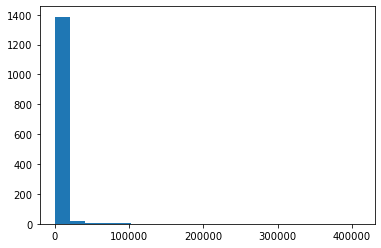

In [127]:
fig, ax = plt.subplots()
ax.hist(ca_fires_df['AcresBurned'], bins=20)

plt.show()

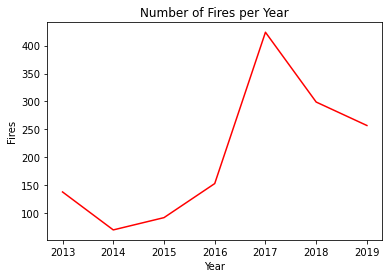

In [110]:
num_fires = ca_fires_df.groupby('StartYear')['AcresBurned'].count()
years = sorted(ca_fires_df['StartYear'].unique())

fig, ax = plt.subplots()
ax.plot(years, num_fires, color='red')
ax.set_title('Number of Fires per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Fires')

plt.show()

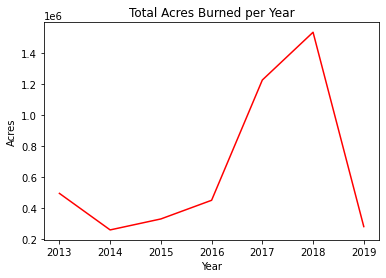

In [121]:
sum_acres = ca_fires_df.groupby('StartYear')['AcresBurned'].sum()
years = sorted(ca_fires_df['StartYear'].unique())

fig, ax = plt.subplots()
ax.plot(years, sum_acres, color='red')
ax.set_title('Total Acres Burned per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Acres')

plt.show()

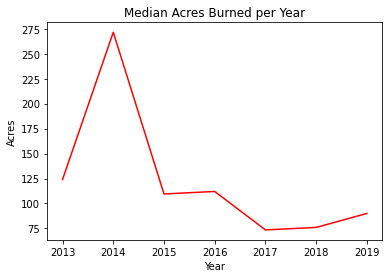

In [116]:
median_acres = ca_fires_df.groupby('StartYear')['AcresBurned'].median()
years = sorted(ca_fires_df['StartYear'].unique())

fig, ax = plt.subplots()
ax.plot(years, sum_acres, color='red')
ax.set_title('Median Acres Burned per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Acres')

plt.show()

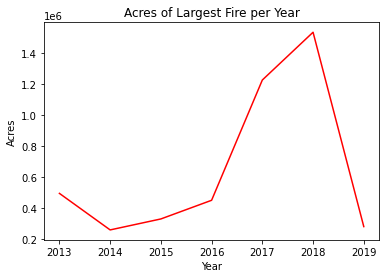

In [182]:
max_acres = ca_fires_df.groupby('StartYear')['AcresBurned'].max()
years = sorted(ca_fires_df['StartYear'].unique())

fig, ax = plt.subplots()
ax.plot(years, sum_acres, color='red')
ax.set_title('Acres of Largest Fire per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Acres')

plt.show()

In [119]:
ca_fires_df[ca_fires_df['StartYear']==2019].sort_values('AcresBurned', ascending=False).head(5)

,UniqueId,Name,Counties,StartYear,StartMonth,AcresBurned,Latitude,Longitude,MajorIncident
703,809d101c-8aa3-4a53-bf20-f38ae7ec7941,Kincade Fire,Sonoma,2019,10,77758.0,38.792458,-122.780053,True
338,3a48b649-8714-433d-9952-ff2bf9e8c90a,Walker Fire,Plumas,2019,9,54612.0,40.061389,-120.680556,False
233,2939928b-0308-4d76-b232-246f064ddd11,Tucker Fire,Modoc,2019,7,14217.0,41.795910,-121.260305,False
1280,e7ea56c5-4290-4406-b0a5-c9d1718e9700,Taboose Fire,Inyo,2019,9,10296.0,37.034000,-118.345000,True
296,31852a71-e639-496f-9e7d-0968d1c218b3,Maria Fire,Ventura,2019,10,9999.0,34.302212,-118.997115,True


In [113]:
ca_fires_df[ca_fires_df['StartYear']==2018].sort_values('AcresBurned', ascending=False).head(5)

,UniqueId,Name,Counties,StartYear,StartMonth,AcresBurned,Latitude,Longitude,MajorIncident
795,90b0daf7-5d84-42d9-bb35-bb78d4faf950,Ranch Fire (Mendocino Complex),Mendocino,2018,7,410203.0,39.243283,-123.103367,True
205,240b1f55-0f4e-448d-a4ce-3ecfec7a6c9d,Carr Fire,Trinity,2018,7,229651.0,40.654280,-122.623570,True
645,75dafe80-f18a-4a4a-9a37-4b564c5f6014,Camp Fire,Butte,2018,11,153336.0,39.813400,-121.434700,True
808,92d7aeea-7abf-47a4-bf76-a4fe0fac65c6,Woolsey Fire,Ventura,2018,11,96949.0,34.235000,-118.701280,True
243,29d15973-a999-409e-adf4-486854df44ed,Ferguson Fire,Mariposa,2018,7,96901.0,37.654900,-119.885810,False


In [118]:
ca_fires_df[ca_fires_df['StartYear']==2017].sort_values('AcresBurned', ascending=False).head(5)

,UniqueId,Name,Counties,StartYear,StartMonth,AcresBurned,Latitude,Longitude,MajorIncident
1153,d28bc34e-73a8-454d-9e55-dea7bdd40bee,Thomas Fire,Ventura,2017,12,281893.0,34.41521,-119.09124,True
1386,f7b03fae-de58-4674-9f4f-d3e9d2762d84,Long Valley Fire,Lassen,2017,7,83733.0,40.07045,-120.14013,False
885,9feb25c4-d3ae-4f78-9fc9-a1ad2b308e42,Detwiler Fire,Mariposa,2017,7,81826.0,37.61757,-120.21321,True
407,490ae25d-c3d8-4a90-9e75-0ad85e0f629f,Eclipse Complex,Siskiyou,2017,8,78698.0,41.84100,-123.47400,False
1054,be79d28c-767d-4a0d-b168-e86a5842004f,Nuns / Adobe / Norrbom/ Pressley / Partrick Fi...,Sonoma,2017,10,56556.0,38.40410,-122.52090,True


In [120]:
ca_fires_df[ca_fires_df['StartYear']==2016].sort_values('AcresBurned', ascending=False).head(5)

,UniqueId,Name,Counties,StartYear,StartMonth,AcresBurned,Latitude,Longitude,MajorIncident
840,977ac7ce-4204-4cd3-9f89-727142165261,Soberanes Fire,Monterey,2016,7,132127.0,36.45994,-121.89938,True
797,91816ff6-d4ec-4f31-8d40-bf2538aca09b,Erskine Fire,Kern,2016,6,48019.0,35.61150,-118.45628,False
16,040d03d0-fbdd-438c-8174-f81e4a1bba57,Chimney Fire,San Luis Obispo,2016,8,46344.0,35.70595,-120.98316,True
1293,ea5193a1-69bc-4684-bfcd-235c17d36756,Blue Cut Fire,San Bernardino,2016,8,36274.0,34.30372,-117.49342,True
728,85683fd7-b507-4ec7-8bbd-fb7033a42665,Gap Fire,Siskiyou,2016,8,33867.0,41.85100,-123.11800,False


2017 had the most fires, but 2018 had the most acres burned. Which one is considered worse?

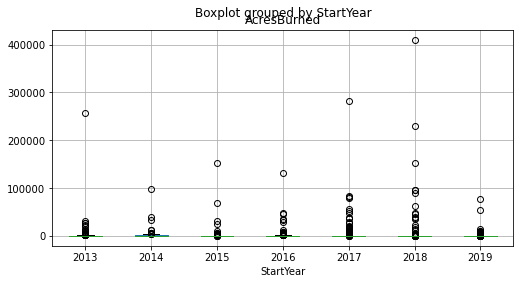

In [192]:
ca_fires_df.boxplot(column='AcresBurned', by='StartYear', figsize=(8, 4))


plt.show()

In [141]:
grouped_acres_sum = ca_fires_df.groupby(['StartYear', 'StartMonth']).sum('AcresBurned')['AcresBurned'].reset_index()

In [142]:
grouped_acres_sum

,StartYear,StartMonth,AcresBurned
0,2013,2,406.0
1,2013,4,379.0
2,2013,5,53957.0
3,2013,6,5127.0
4,2013,7,77082.0
...,...,...,...
60,2019,7,20463.0
61,2019,8,15129.0
62,2019,9,101251.0
63,2019,10,119814.0


In [159]:
def parse_grouped_sums(grouped_df, year_lst):
    '''
    Creates a list of dataframes parsed by year.
    Parameters: grouped dataframe, list of years
    Returns: list of dataframes
    '''
    parse_lst = []
    
    for year in year_lst:
        parse_lst.append(grouped_df[grouped_df['StartYear']==year])
    return parse_lst   

In [168]:
df_lst = parse_grouped_sums(grouped_acres_sum, year_lst)

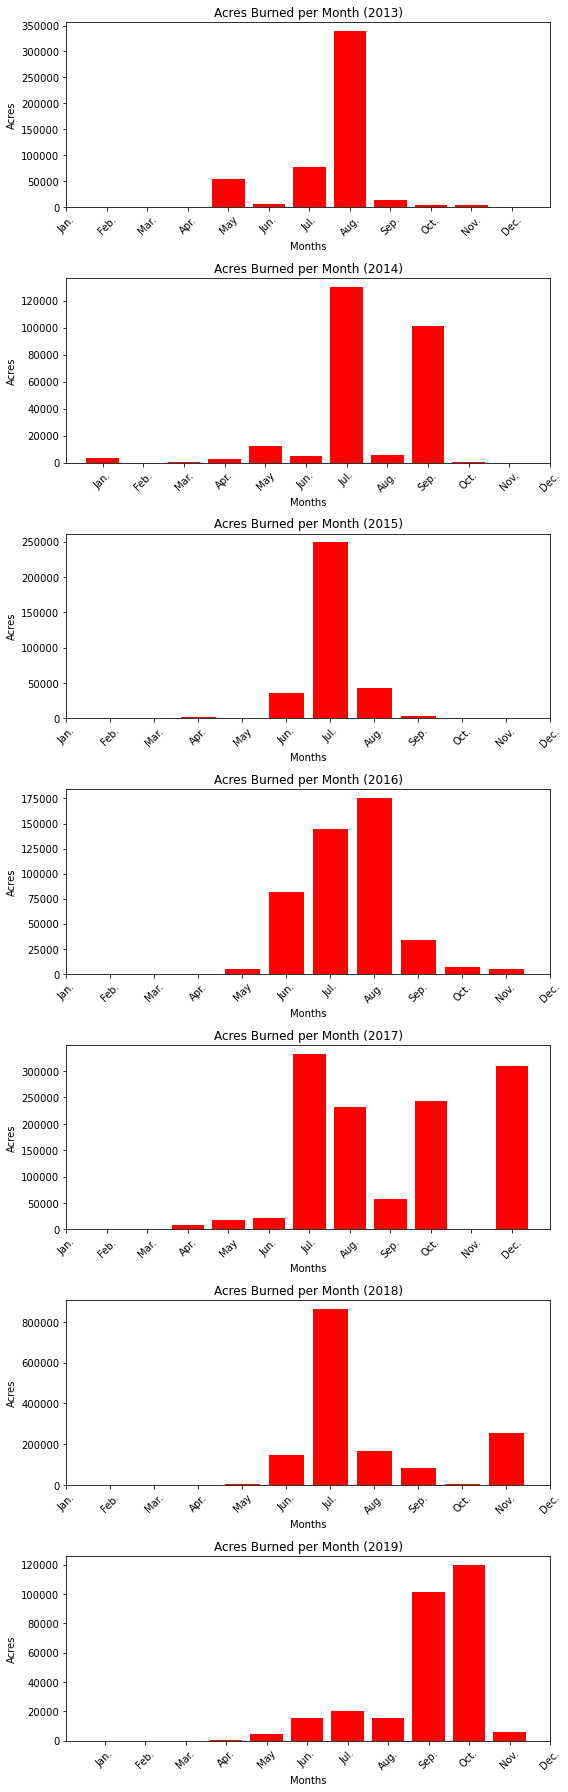

In [169]:
month_labels = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']
fig, axs = plt.subplots(7, 1, figsize=(8, 25))

for idx, ax in enumerate(axs.flatten()):
    ax.bar(df_lst[idx]['StartMonth'], height=df_lst[idx]['AcresBurned'], color='red')
        
    ax.set_xticks(list(range(1, 13)))
    ax.set_xticklabels(month_labels, rotation=45)
        
    ax.set_title(f'Acres Burned per Month ({year_lst[idx]})')
    ax.set_xlabel('Months')
    ax.set_ylabel('Acres')

fig.tight_layout()
plt.show()

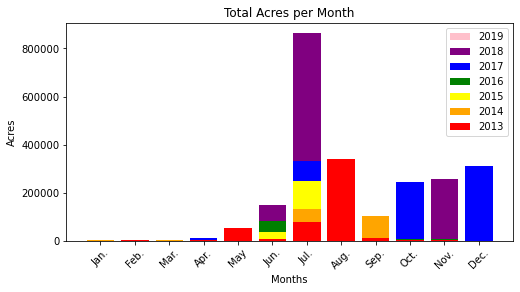

In [180]:
month_labels = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']
fig, axs = plt.subplots(figsize=(8, 4))

axs.bar(df_lst[6]['StartMonth'], height=df_lst[6]['AcresBurned'], color='pink', label='2019')
axs.bar(df_lst[5]['StartMonth'], height=df_lst[5]['AcresBurned'], color='purple', label='2018')
axs.bar(df_lst[4]['StartMonth'], height=df_lst[4]['AcresBurned'], color='blue', label='2017')
axs.bar(df_lst[3]['StartMonth'], height=df_lst[3]['AcresBurned'], color='green', label='2016')
axs.bar(df_lst[2]['StartMonth'], height=df_lst[2]['AcresBurned'], color='yellow', label='2015')
axs.bar(df_lst[1]['StartMonth'], height=df_lst[1]['AcresBurned'], color='orange', label='2014')
axs.bar(df_lst[0]['StartMonth'], height=df_lst[0]['AcresBurned'], color='red', label='2013')
        
axs.set_xticks(list(range(1, 13)))
axs.set_xticklabels(month_labels, rotation=45)
        
axs.set_title('Total Acres per Month')
axs.set_xlabel('Months')
axs.set_ylabel('Acres')

axs.legend()

plt.show()

Terrible graph, but it shows that 2017 and 2018 had most of the acres burned for most months.

PROBABLY WON'T USE BUT DON'T WANT TO DELETE YET!!!!

In [143]:
def month_counter(year):
    '''
    Creates a dictionary containing the counts for each month in a particular year for ca_fires_df.
    Parameters: integer year
    Returns: dictionary
    '''
    
    months_dct = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}
    
    for month in ca_fires_df[ca_fires_df['StartYear']==year]['StartMonth']:
        if month in months_dct:
            months_dct[month] += ca_fires_df['AcresBurned']
            
    return months_dct

In [129]:
def apply_month_counter(year_lst):
    '''
    Applies the previous month_counter() to a list of years.
    Parameters: list of integer years
    Returns: list of dictionaries where each dictionary represents the distribution of months per year
    '''
    
    dct_lst = [month_counter(year) for year in year_lst]
    
    return dct_lst

In [131]:
year_lst = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
fires_dct_lst = apply_month_counter(year_lst)
fires_dct_lst[0]

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}

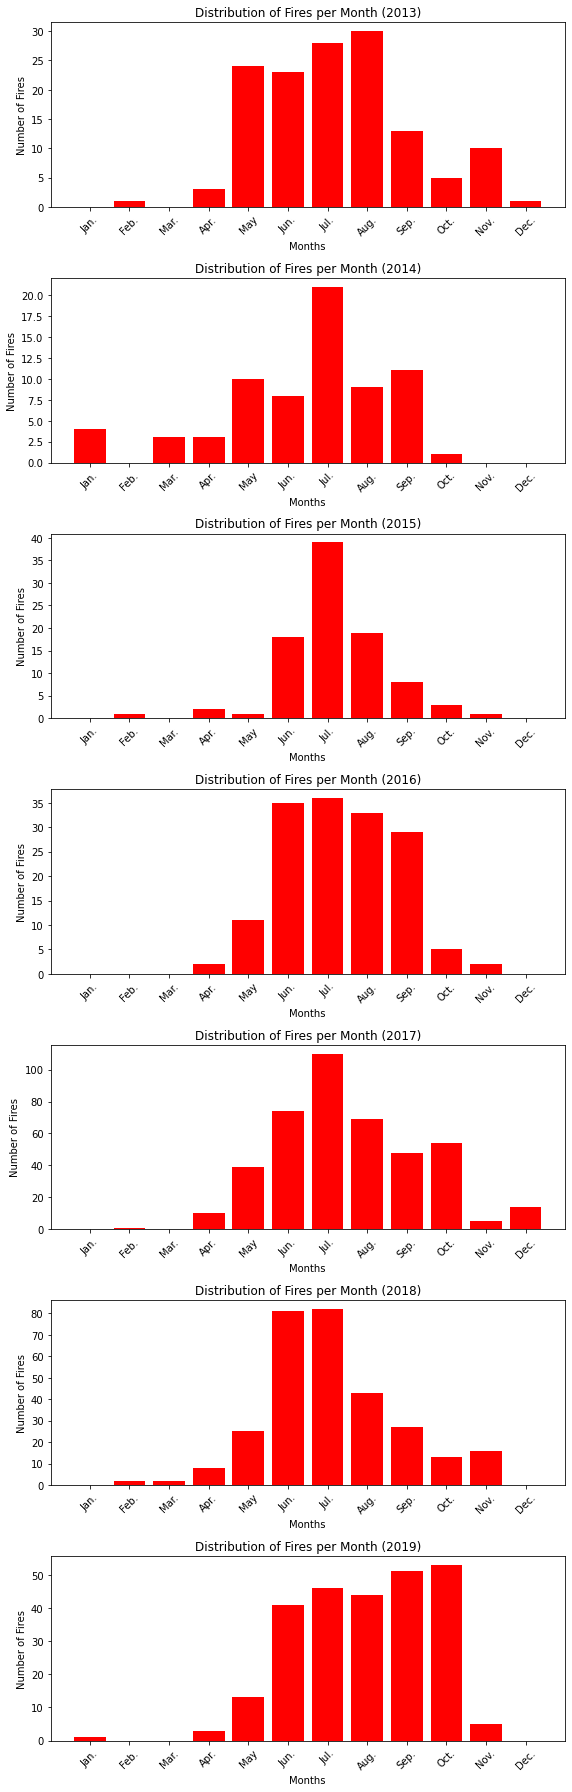

In [143]:
month_labels = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']
fig, axs = plt.subplots(7, 1, figsize=(8, 25))

for idx, ax in enumerate(axs.flatten()):
    ax.bar(fires_dct_lst[idx].keys(), height=fires_dct_lst[idx].values(), color='red')
        
    ax.set_xticks(list(range(1, 13)))
    ax.set_xticklabels(month_labels, rotation=45)
        
    ax.set_title(f'Distribution of Fires per Month ({year_lst[idx]})')
    ax.set_xlabel('Months')
    ax.set_ylabel('Number of Fires')

fig.tight_layout()
plt.show()

See shift from spring fires to fall fires. Not sure why? Could be because fall is getting warmer?

In [30]:
ca_fires_df['StartYear'].value_counts()

2017    429
2018    308
2019    259
2016    154
2013    144
2015     93
2014     72
Name: StartYear, dtype: int64

In [51]:
mi_lst = []
for year in year_lst:
    mi_lst.append(ca_fires_df[ca_fires_df['StartYear']==year]['MajorIncident'])

0      False
1      False
2      False
3      False
5      False
       ...  
155    False
156    False
158    False
160    False
161    False
Name: MajorIncident, Length: 143, dtype: bool

In [60]:
nk_dct = {}
for bool_lst in mi_lst:
    nk_dct[len(bool_lst)] = sum(bool_lst)

In [61]:
nk_dct.items()

dict_items([(143, 42), (72, 30), (93, 38), (154, 44), (429, 92), (308, 72), (259, 29)])

In [83]:
post_dist = []
for n, k in nk_dct.items():
    post_dist.append(stats.distributions.beta(a = 1 + k, b = 1 + n - k))

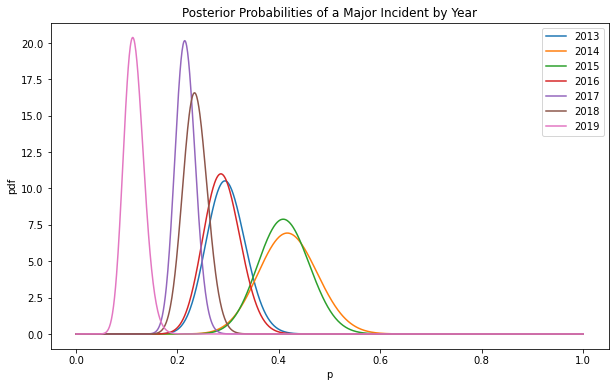

In [84]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(0,1,1000)
year_lst = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
for idx, dist in enumerate(post_dist):
    ax.plot(x, dist.pdf(x), label=f'{year_lst[idx]}')
    ax.legend()
    ax.set_title('Posterior Probabilities of a Major Incident by Year')
    ax.set_xlabel('p')
    ax.set_ylabel('pdf')

Number of fires in 2019 plummeted because of heavy precipitation. Could account for the fact that people did not think of them as a major incident.

Sources:
https://towardsdatascience.com/data-101s-spatial-visualizations-and-analysis-in-python-with-folium-39730da2adf
https://www.sciencemag.org/news/2020/03/us-wildfires-plummeted-2019-experts-say-it-won-t-last
https://wildfiretoday.com/2015/11/09/was-the-2014-wildfire-season-in-california-affected-by-climate-change/

Fires in 2019 plummeted because of heavy precipitation in forests and grasslands. Scientists called it a weird anomolie.